### DataSciene Spring 2019 Now You "C" Me Group
link to video: https://youtu.be/lhodcPtmywc

In [148]:
import numpy as np
import pandas as pd
import os

from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

from sklearn import tree

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import chi2

from sklearn import svm

import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

In [149]:
filepath = os.path.abspath("Documents/Data Science/now-u-c-me-datascience-final-project/Output_Tables_and_Results/ARPE_Combined_Cleaned_Data.csv")
print(filepath)

/Users/rachelmuller/Documents/Data Science/now-u-c-me-datascience-final-project/Output_Tables_and_Results/ARPE_Combined_Cleaned_Data.csv


In [186]:
dataset = pd.read_pickle("Documents/Data Science/now-u-c-me-datascience-final-project/Output_Tables_and_Results/ARPE_Combined_Cleaned_Data.pkl")

In [184]:
dataset = pd.read_csv(filepath)# , engine='python'
titles = ["Ensembl_ID","Change","Name","Biotype","Chr","Length","Exonic Length","TSS_Downregulated","Downstream_Promoter_Downregulated","Gene_Body_Downregulated","Upstream_Promoter_Downregulated","TSS_Nondifferential","Downstream_Promoter_Nondifferential","Gene_Body_Nondifferential","Upstream_Promoter_Nondifferential","TSS_Upregulated","Downstream_Promoter_Upregulated","Gene_Body_Upregulated","Upstream_Promoter_Upregulated"]
dataset.columns = titles
dataset.head()
dataset = dataset.drop(columns = ['Name'])


In [187]:
dataset.head()

,Change,Name,Biotype,Chr,Length,Exonic Length,TSS_Downregulated,Downstream_Promoter_Downregulated,Gene_Body_Downregulated,Upstream_Promoter_Downregulated,TSS_Nondifferential,Downstream_Promoter_Nondifferential,Gene_Body_Nondifferential,Upstream_Promoter_Nondifferential,TSS_Upregulated,Downstream_Promoter_Upregulated,Gene_Body_Upregulated,Upstream_Promoter_Upregulated
Ensembl_ID,,,,,,,,,,,,,,,,,,
ENSG00000000003,Downregulated,TSPAN6,protein_coding,X,9996.0,3796.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ENSG00000000419,Nondifferential,DPM1,protein_coding,20,23689.0,1161.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000457,Nondifferential,SCYL3,protein_coding,1,44322.0,6364.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
ENSG00000000460,Nondifferential,C1orf112,protein_coding,1,58672.0,4355.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0
ENSG00000000971,Upregulated,CFH,protein_coding,1,95627.0,4127.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [188]:
changes = dataset['Change']
up = dataset['Change'] == "Upregulated"
down = dataset['Change'] == "Downregulated"
non = dataset['Change'] == "Nondifferential"

dataset_up = dataset[up]
dataset_down = dataset[down]
dataset_non = dataset[non]
print(str(dataset_up.shape[0]) +  " genes are upregulated")
print(str(dataset_down.shape[0]) +  " genes are downregulated")
print(str(dataset_non.shape[0]) +  " genes are nondifferential")
print(len(dataset))
a = 3245+1434+9920
print(a)

3262 genes are upregulated
1417 genes are downregulated
9920 genes are nondifferential
14599
14599


In [190]:
dataset.Change.replace(('Upregulated', 'Nondifferential', 'Downregulated'), (2,1,0), inplace=True)
dataset.Chr.replace(('X', 'Y'), (0, 100), inplace = True)

dataset = dataset[dataset.Chr != 'MT']
dataset = dataset[dataset.Chr != 'KI270711.1']
dataset = dataset[dataset.Chr != 'KI270713.1']
dataset = dataset[dataset.Chr != 'GL000195.1']
dataset = dataset[dataset.Chr != 'GL000219.1']


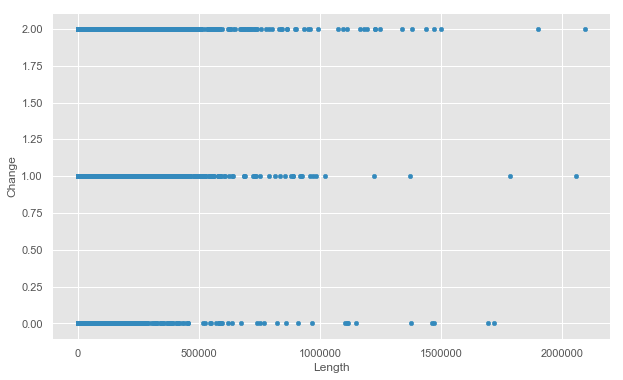

In [191]:
dataset.plot(y = "Change", x = "Length", kind = 'scatter')

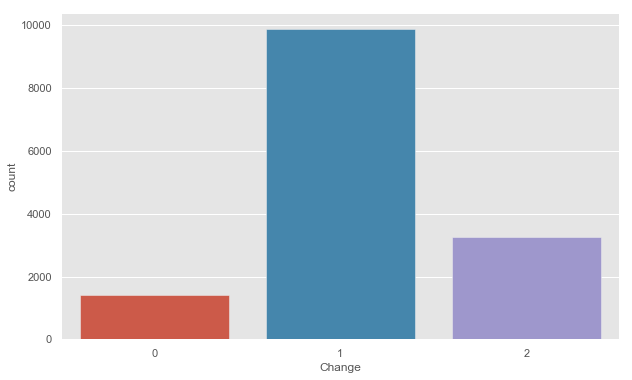

In [192]:
type_ = "Change"
ax = sns.countplot(x = type_, data = dataset)

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


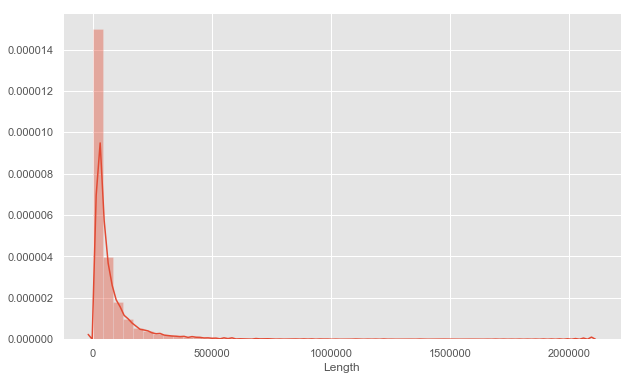

In [193]:
sns.distplot(dataset["Length"])

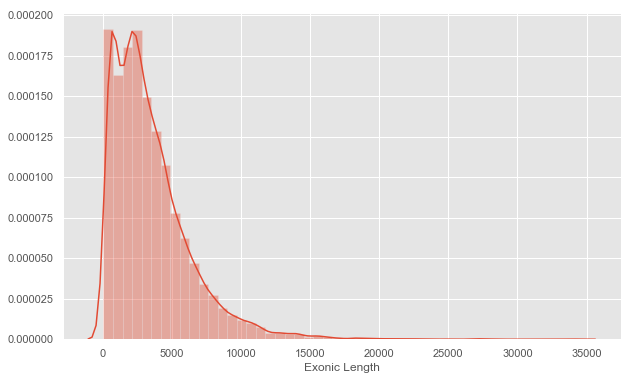

In [194]:
sns.distplot(dataset["Exonic Length"])

In [195]:
#a = sns.catplot("Exonic Length", col = type_, col_wrap = 4, 
                #data = dataset[dataset["Exonic Length"].notnull()],
                #kind = "count", height = 4.5, aspect = 0.8)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

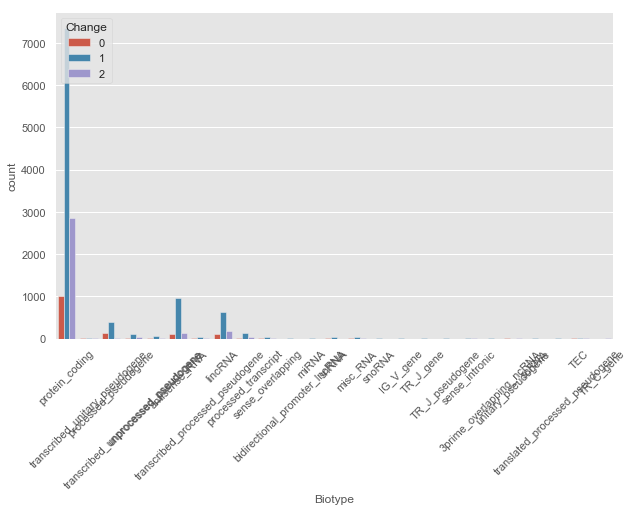

In [196]:
sns.countplot(x = "Biotype", hue = type_, data=dataset, );
plt.xticks(rotation = 45)


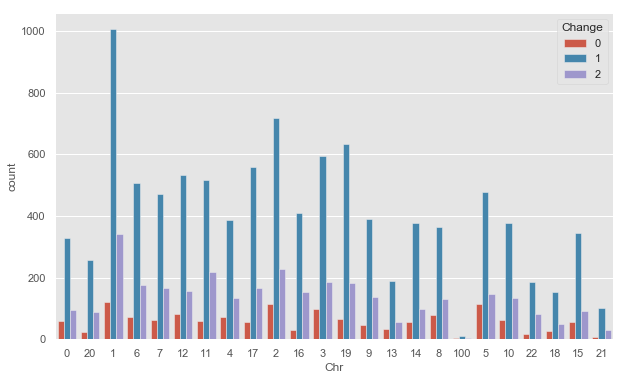

In [197]:
sns.countplot(x = "Chr", hue = type_, data=dataset);

In [200]:
knn_dataset = dataset[["Change","Length","Exonic Length","TSS_Downregulated","Downstream_Promoter_Downregulated","Gene_Body_Downregulated","Upstream_Promoter_Downregulated","TSS_Nondifferential","Downstream_Promoter_Nondifferential","Gene_Body_Nondifferential","Upstream_Promoter_Nondifferential","TSS_Upregulated","Downstream_Promoter_Upregulated","Gene_Body_Upregulated","Upstream_Promoter_Upregulated"]]

In [225]:
knn_dataset.columns[1:]

Index(['Length', 'Exonic Length', 'TSS_Downregulated',
       'Downstream_Promoter_Downregulated', 'Gene_Body_Downregulated',
       'Upstream_Promoter_Downregulated', 'TSS_Nondifferential',
       'Downstream_Promoter_Nondifferential', 'Gene_Body_Nondifferential',
       'Upstream_Promoter_Nondifferential', 'TSS_Upregulated',
       'Downstream_Promoter_Upregulated', 'Gene_Body_Upregulated',
       'Upstream_Promoter_Upregulated'],
      dtype='object')

In [227]:
#features = knn_dataset.columns()
features = knn_dataset.columns[1:]
X = knn_dataset[features].values
y = knn_dataset['Change'].values

selector = SelectPercentile(chi2)
X_new = selector.fit_transform(X, y)
print(X)
print("P Values:", selector.pvalues_)

[[9.99600e+03 3.79600e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [2.36890e+04 1.16100e+03 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 [4.43220e+04 6.36400e+03 0.00000e+00 ... 0.00000e+00 1.00000e+00
  0.00000e+00]
 ...
 [2.75580e+05 1.67500e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [4.23420e+04 1.19800e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]
 [1.21298e+05 3.74300e+03 0.00000e+00 ... 0.00000e+00 0.00000e+00
  0.00000e+00]]
P Values: [0.00000000e+000 0.00000000e+000 4.43033110e-001 1.74082557e-001
 7.43742873e-069 2.51351527e-001 1.71899508e-013 3.65645666e-029
 0.00000000e+000 3.11208644e-048 3.85746305e-117 1.05042279e-226
 0.00000000e+000 4.71657822e-210]


In [228]:
selector = SelectKBest(chi2, k=3)
X_new = selector.fit_transform(X, y)
print(features)
selector.get_support()

Index(['Length', 'Exonic Length', 'TSS_Downregulated',
       'Downstream_Promoter_Downregulated', 'Gene_Body_Downregulated',
       'Upstream_Promoter_Downregulated', 'TSS_Nondifferential',
       'Downstream_Promoter_Nondifferential', 'Gene_Body_Nondifferential',
       'Upstream_Promoter_Nondifferential', 'TSS_Upregulated',
       'Downstream_Promoter_Upregulated', 'Gene_Body_Upregulated',
       'Upstream_Promoter_Upregulated'],
      dtype='object')


array([ True,  True, False, False, False, False, False, False, False,
       False, False, False,  True, False])

In [229]:
best_features = ['Length', 'Exonic Length']

In [230]:
def splitData(features):
    change_labels = dataset["Change"].values
    change_predictors = dataset[features].values
    
    #split into training and test sets
    xtrain, xtest, ytrain, ytest = train_test_split(change_predictors, change_labels,
                                                   random_state = 1, test_size = 0.2)
    return xtrain, xtest, ytrain, ytest

In [232]:

xtrain, xtest, ytrain, ytest = splitData(best_features)
knearest_model = KNeighborsClassifier(n_neighbors = 20)
knearest_model.fit(xtrain, ytrain)

y_pred = knearest_model.predict(xtest)

print('Confusion Matrix:')
print(metrics.confusion_matrix(y_true = ytest, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = ytest, y_pred = y_pred))


Confusion Matrix:
[[   0  297   20]
 [   0 1863   87]
 [   0  580   67]]
Accuracy =  0.6623198352779684


It's clunky but it works... Let me know what I could do better or what you're seeing from this. I'm not quite sure how to interpret this.